# Домашнее задание №1. 
# Метод наименьших квадратов.
### Выполнила: Леонтьева Ксения Андреевна
### Группа: НПМбд-01-19

In [2]:
import numpy as np
from matplotlib import pyplot as plt

Рассматривается математическая функция на отрезке x $\in$ [1, 15]: 
$f(x) = \sin \frac{x}{5} \cdot e^{\frac{x}{10}} + 5 e^{- \frac{1}{2} x} $.

Необходимо приблизить данную функцию многочленом: 
${w_0} + {w_1}x + {w_2}x^2 + {w_3}x^3 + ... + {w_{n-1}}x^{n-1}$

In [3]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

Неизвестные ${w_0}, {w_1}, {w_2}, ..., {w_{n-1}}$ можно определить из системы линейных уравнений, т.к. наш многочлен степени n-1 однозначно определяется любыми n различными точками, через которые он проходит: 

$\begin{equation*}
 \begin{cases}
   w_0 + w_1 x_1 + w_2 x_1^2 + w_3 x_1^3 + \dots + w_{n - 1} x_1^{n - 1} = f (x_1) 
   \\
   \cdots
   \\
   w_0 + w_1 x_n + w_2 x_n^2 + w_3 x_n^3 + \dots + w_{n - 1} x_n^{n - 1} = f (x_n)
 \end{cases}
\end{equation*}$

### Задание 1:  Полиномиальная регрессия

Используя ранее указанное свойство, находим приближение функции многочленом, решая заданную систему линейных уравнений.

Задаем матрицу А, состоящую из коэффициентов ${x_i}$, и вектор b, состоящий из правых частей ${f(x_i)}$. Таким образом, наша система эквивалентна Ax = b, откуда и найдем требуемые коэффициенты.

Задаем полином с найденными коэффициентами.

In [4]:
def compute_polynomial_coeffs(n):
    '''
    n - количество точек
    '''
    xx = np.linspace(1, 15, n)
    yy = f(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:, i] = xx ** i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * (x**i)
    return result

Построим графики исходной функции, точек, по которым строился многочлен и полиномиальную аппроксимацию. 

При значении n = 5 видны различия между графиком исходной функции и полиномом.

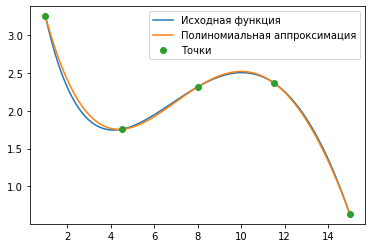

In [5]:
n = 5
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='Исходная функция')
plt.plot(xx, polynome(w, xx), label='Полиномиальная аппроксимация')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='Точки')
plt.legend()

При значении n = 15 графики совпадают (почти совпадают).

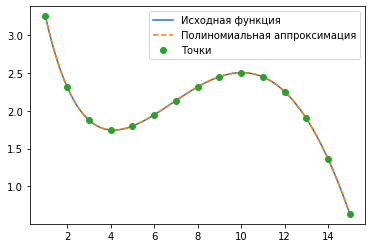

In [6]:
n = 15
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='Исходная функция')
plt.plot(xx, polynome(w, xx), '--', label='Полиномиальная аппроксимация')
xx = np.linspace(1, 15, n)
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='Точки')
plt.legend()

Таким образом, приближение с ростом числа точек (и соответственно степени полинома) становится более точным.

### Задание 2: Полиномиальная регрессия с зашумлёнными данными

В данном случае значение функции f известно с некоторой неточностью, т.к. к ее значениям в точках ${x_i}$ добавлен случайный шум.

In [7]:
def compute_polynomial_coeffs_noise(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:, i] = xx**i
    return np.linalg.solve(A, b)

Построим те же графики, что и в предыдущем задании.

В данном случае при увеличении количества точек n, приближение графика полиномом на концах становится наоборот хуже, потому что даже при небольшом изменении аргумента (появлении шума), значение заметно функции изменяется (матрица А становится плохо обсусловленной).

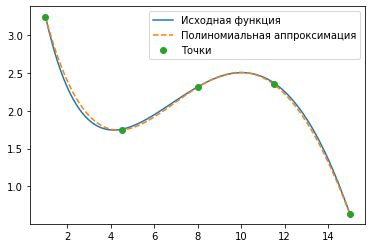

In [8]:
n = 5
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = compute_polynomial_coeffs_noise(x_points, y_points)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='Исходная функция')
plt.plot(xx, polynome(w, xx), '--', label='Полиномиальная аппроксимация')
plt.plot(x_points, y_points, 'o', label='Точки')
plt.legend()

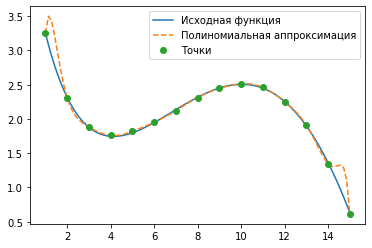

In [9]:
n = 15
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = compute_polynomial_coeffs_noise(x_points, y_points)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label = 'Исходная функция')
plt.plot(xx,  polynome(w, xx), '--', label = 'Полиномиальная аппроксимация')
plt.plot(x_points, y_points, 'o', label='Точки')
plt.legend()

### Задание 3: Метод наименьших квадратов

В предыдущих случаях строилась полиномиальная регрессия той степени, которая соответствовала числу точек, в то время как на практике для удобства ограничиваются полиномами невысоких степеней, независимо от того, сколько точек имеется.

Теперь же рассмотрим случай, когда точек много. Пусть их N штук, причем N>n, а полином остался прежним. Тогда в нашей системе линейных уравнений количество уравнений получится больше, чем число неизвестных, и тогда эта система может не иметь точного решения, особенно, когда правая часть с шумом.

Поэтому в данном случае решают задачу минимизации невязки уравнений: $\min\limits_{x} \vert\vert A x - b \vert\vert$. 
Т.к. в качестве нормы используют квадратичную норму, то этот метод и называется методом наименьших квадратов.

Решение такой задачи имеет вид: $x = (A^T A)^{-1} A^T b$, где $(A^T A)^{-1} A^T$ - псевдообратная матрица Пенроуза-Мура.

In [10]:
def least_squares(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    deg = 3
    n = len(xx)
    b = yy
    A = np.zeros((n, deg+1))
    for i in range(deg+1):
        A[:, i] = xx**i
    return np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A)).dot(b)

Построив графики, можем заметить, что кубический полином, несмотря на шум, приближает нашу функцию довольно хорошо. А с увеличением степени это приближение будет еще точнее.

[ 3.88518964 -1.06324936  0.16697922 -0.00741742]


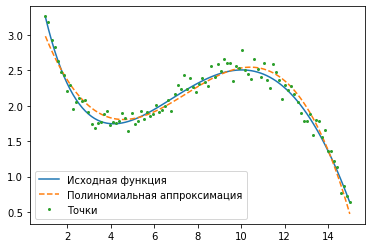

In [11]:
n = 100
noise = 0.1
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = least_squares(x_points, y_points)
xx = np.linspace(1, 15, 100)
plt.plot(x_points, f(x_points), label = 'Исходная функция')
plt.plot(x_points,  polynome(w, x_points), '--', label = 'Полиномиальная аппроксимация')
plt.plot(x_points, y_points, 'o', label='Точки', markersize = 2)
plt.legend()
print(w)

В итоге можем сделать вывод, что используя метод наименьших квадратов вместо полиномиальной регрессии, мы можем получить более точное приближение полиномом невысокой степени, даже если присутствует шум.